# gshow function

### Apply binary overlays as color layers on a binary or gray-scale image

Y = iagshow(X, X1=NULL, X2=NULL, X3=NULL, X4=NULL, X5=NULL, X6=NULL)
Y: Image

X: Image

X1: Image Red overlay.

X2: Image Green overlay.

X3: Image Blue overlay.

X4: Image Magenta overlay.

X5: Image Yellow overlay.

X6: Image Cyan overlay.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import sys,os
ia898path = os.path.abspath('/etc/jupyterhub/ia898_1s2017/')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia

ia636path = os.path.abspath('/home/lotufo/ia636/ia636/')
if ia636path not in sys.path:
    sys.path.append(ia636path)
testing = (__name__ == "__main__")

In [2]:
def rgbOut(X_rgb,X_,comb_rgb):
    r, g, b = X_rgb
    if (X_.dtype != np.bool): raise Exception(X_.origname,' must be binary overlay')
    if comb_rgb[0]==0: r = np.where(~X_,r,0)
    else: r = np.where(X_,255,r)
    if comb_rgb[1]==0: g = np.where(~X_,g,0)
    else: g = np.where(X_,255,g)
    if comb_rgb[2]==0: b = np.where(~X_,b,0)
    else: b = np.where(X_,255,b)
    return [r, g, b]

In [3]:
def gshow(X, X1=None, X2=None, X3=None, X4=None, X5=None, X6=None):
    if X.dtype == np.bool: X = np.where(X,255,0).astype('uint8')
    rgb=[X,X,X]
    if X1 is not None: rgb = rgbOut(rgb, X1, [1, 0, 0]) # red
    if X2 is not None: rgb = rgbOut(rgb, X2, [0, 1, 0]) # green
    if X3 is not None: rgb = rgbOut(rgb, X3, [0, 0, 1]) # blue
    if X4 is not None: rgb = rgbOut(rgb, X4, [1, 0, 1]) # magenta
    if X5 is not None: rgb = rgbOut(rgb, X5, [1, 1, 0]) # yellow
    if X6 is not None: rgb = rgbOut(rgb, X6, [0, 1, 1]) # cyan
    return np.array(rgb)

""
pixels with values: green -> f>230

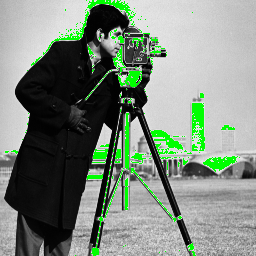

1000 loops, best of 3: 507 µs per loop


In [5]:
if testing:
    f = mpimg.imread('/home/lotufo/ia898/data/cameraman.tif')
    ff=np.ones(f.shape, dtype=bool)
    g1 = gshow(f,None,f>230)
    ia.adshow(g1,'pixels with values: green -> f>230')
    %timeit gshow(f,None,f>230)